# Lab 6 - 10/11

Link github: https://github.com/ilariavascotto/UL_2023_fall

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import norm, t
import myfunctions as f

## Ex 1

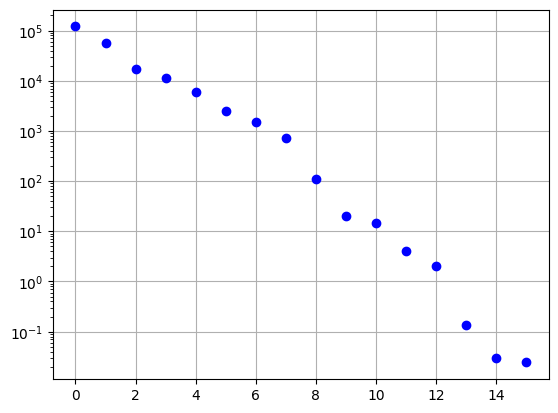

In [2]:
# Generate the data
beans = pd.read_excel('Datasets/Dry_Bean_Dataset.xlsx')
data = beans.loc [:, beans.columns != "Class"]
output = beans.loc[:, "Class"]
data = f.normalize_data(data)

# Plot eigenvalue spectrum
cov = np.dot(data.T, data)

# Eigenvalues, eigenvectors, and U
eigenvalues = np.linalg.eig(cov)[0]
eigenvectors = np.linalg.eig(cov)[1]
idx = np.argsort(eigenvalues)[::-1]

# Plot eigenvalue spectrum
plt.semilogy(sorted(eigenvalues, reverse=True), 'bo')
plt.grid()

In [3]:
# Fidelity 
n = 4
fidelity = np.sum(eigenvalues[idx[0:n]])/np.sum(eigenvalues)
print("Number of eigenvalues: %d" %n)
print("Fidelity is %f" %fidelity)

Number of eigenvalues: 4
Fidelity is 0.950181


In [4]:
# Intrinsic dimension
d_ML = f.two_NN(data, 'ML')
d_CDF = f.two_NN(data, 'CDF')
print(f"The intrinsic dimensionality of the data obtained via maximum likelihood is {d_ML}.")
print(f"The intrinsic dimensionality of the data obtained via cumulative distribution function is {d_CDF}.")

The intrinsic dimensionality of the data obtained via maximum likelihood is 5.788571837982901.
The intrinsic dimensionality of the data obtained via cumulative distribution function is 5.725046014808128.


The intrinsic dimensionality $d = 5$ obtained from two-NN is higher than that I would choose with PCA, i.e. $d = 3$, yet it is compatible as it corresponds to a fidelity threshold of 0.95.

## Ex 2

In [5]:
# Generate data
n = 100
np.random.seed(44)
x = np.concatenate((np.random.standard_t(1,int(0.04*n))-3.5,np.random.normal(5,1,int(0.48*n)),np.random.normal(7.5,1,int(0.48 * n))))[:,np.newaxis][:,0]

# Compute the true pdf of the data
x_plot = np.linspace(-5, 15, 1000)[:, np.newaxis]
true_dens = 0.04*t(df=1,loc=-3.5).pdf(x_plot[:, 0]) + 0.48*norm(5, 1).pdf(x_plot[:, 0])+0.48*norm(7.5,1).pdf(x_plot[:,0])

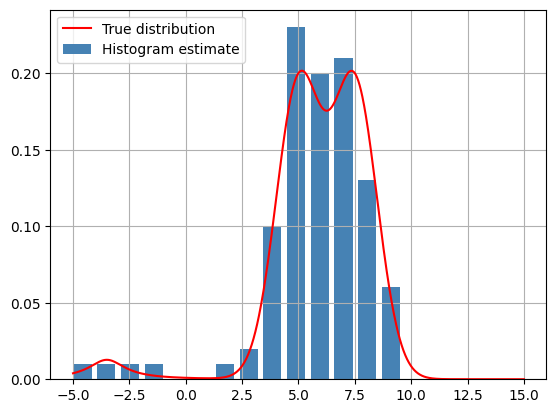

In [6]:
# Histogram
f.histogram(x)
plt.plot(x_plot, true_dens, 'r')
plt.legend(['True distribution', 'Histogram estimate'])
plt.show()

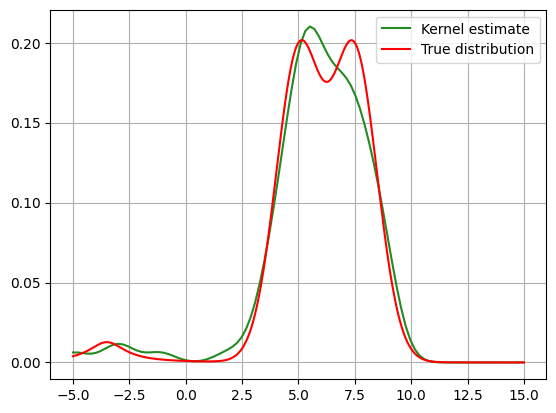

In [7]:
# Kernel density estimation
f.kde(x)
plt.plot(x_plot, true_dens, 'r')
plt.legend(['Kernel estimate', 'True distribution'])
plt.show()